In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def segment_grid_into_cells(lines):
    # Separate the lines into horizontal and vertical
    horizontal_lines = []
    vertical_lines = []

    for line in lines:
        rho, theta = line[0]
        if abs(np.sin(theta)) < 0.1:  # Horizontal lines
            horizontal_lines.append(rho)
        else:  # Vertical lines
            vertical_lines.append(rho)

    # Sort the lines
    horizontal_lines.sort()
    vertical_lines.sort()

    # Get intersection points
    intersections = []
    for y in horizontal_lines:
        for x in vertical_lines:
            intersections.append((x, y))

    # Group intersections into cells
    cells = []
    for i in range(2):
        for j in range(2):
            top_left = intersections[i * 3 + j]
            bottom_right = intersections[(i + 1) * 3 + (j + 1)]
            cell = img[int(top_left[1]):int(bottom_right[1]), int(top_left[0]):int(bottom_right[0])]
            cells.append(cell)

    return cells


In [ ]:
# Read image
img = cv2.imread('board2.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
edges = cv2.Canny(blurred, 50, 150)
plt.imshow(edges)
lines = cv2.HoughLines(edges, 1, np.pi / 180, 200)
print(lines)

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[]


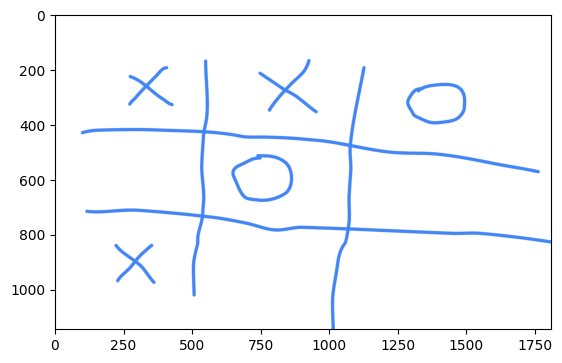

In [12]:
import cv2
import easyocr
import matplotlib.pyplot as plt
import numpy as np

# read image
image_path = r'/home/mrcyme/Documents/FARI/repositories/demo-fari-robotic-arm/tic tac toe/board2.png'

img = cv2.imread(image_path)

# instance text detector
reader = easyocr.Reader(['en'])

# detect text on image
text_ = reader.readtext(img)
print(text_)
threshold = 0.25
# draw bbox and text
for t_, t in enumerate(text_):
    print(t)

    bbox, text, score = t

    if score > threshold:
        cv2.rectangle(img, bbox[0], bbox[2], (0, 255, 0), 5)
        cv2.putText(img, text, bbox[0], cv2.FONT_HERSHEY_COMPLEX, 0.65, (255, 0, 0), 2)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [11]:
print(text_)

[]


In [1]:
from roboflow import Roboflow

rf = Roboflow(api_key='rf_iMqksSVjtdRfd6SOUSMVFUtiSEb2')
project = rf.workspace("simeonmcl-gmail-com").project("tic-tac-toe-nj8h0")
dataset = project.version(1).download("yolov8")

RuntimeError: {
    "error": {
        "message": "This API key does not exist (or has been revoked).",
        "type": "OAuthException",
        "hint": "You may retrieve your API key via the Roboflow Dashboard. Go to Account > Roboflow Keys to retrieve yours.",
        "key": "rf_iMqksSVjtdRfd6SOUSMVFUtiSEb2"
    }
}

In [ ]:
!yolo task=detect \
mode=train \
model=yolov8s.pt \
data={dataset.location}/data.yaml \
epochs=100 \
imgsz=640